<a href="https://colab.research.google.com/github/Althaf0097/Demo/blob/main/chum_data_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv('/content/churn-data-v2.csv')

In [60]:
df.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,530.0,two,157.0,3+,no,yes,no,sales,low
1,0.80,860.0,five,262.0,6+,no,yes,no,sales,medium
2,0.11,880.0,seven,272.0,4+,no,yes,no,sales,medium
3,0.72,870.0,five,223.0,5+,no,yes,no,sales,low
4,0.37,520.0,two,159.0,3+,no,yes,no,sales,low


In [61]:
df.shape

(14999, 10)

In [62]:
df.size

149990

In [63]:
df.describe()

,satisfaction,evaluation,average_montly_hours
count,14990.000000,14936.000000,14973.000000
mean,0.612817,716.085297,201.050424
std,0.248704,171.529563,49.986445
min,0.090000,360.000000,96.000000
25%,0.440000,560.000000,156.000000
50%,0.640000,720.000000,200.000000
75%,0.820000,870.000000,245.000000
max,1.000000,1000.000000,310.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14990 non-null  float64
 1   evaluation            14936 non-null  float64
 2   number_of_projects    14955 non-null  object 
 3   average_montly_hours  14973 non-null  float64
 4   time_spend_company    14999 non-null  object 
 5   work_accident         14999 non-null  object 
 6   churn                 14999 non-null  object 
 7   promotion             14999 non-null  object 
 8   department            14958 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.1+ MB


In [65]:
df.isna().sum()

,0
satisfaction,9
evaluation,63
number_of_projects,44
average_montly_hours,26
time_spend_company,0
work_accident,0
churn,0
promotion,0
department,41
salary,0


In [66]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD', nan], dtype=object)

In [67]:
df.drop(['department','number_of_projects'],axis=1,inplace=True)

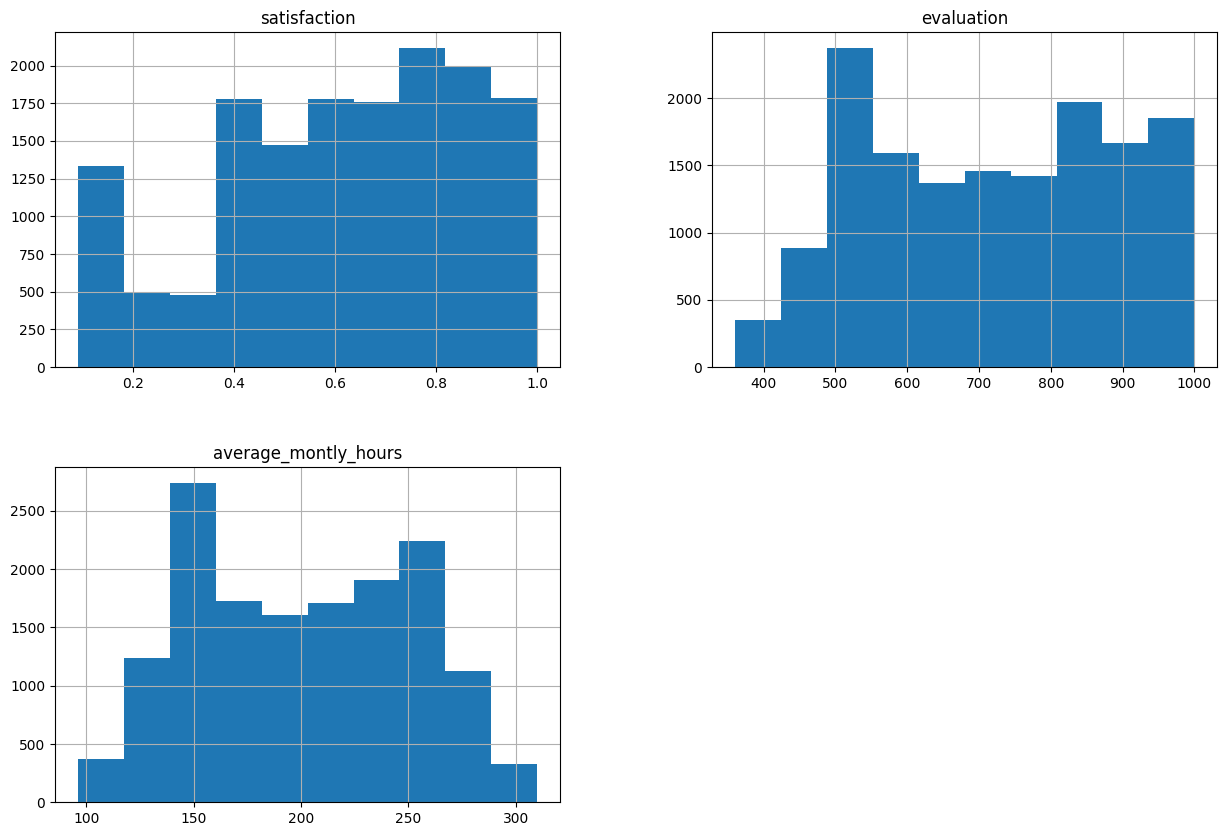

In [68]:
import matplotlib.pyplot as plt
freqplot = df.select_dtypes(include = ['float','int'])
freqplot.hist(figsize = (15,10))
plt.show()

In [69]:
col = ['satisfaction','evaluation','average_montly_hours']


In [70]:
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

In [71]:
df.isna().sum()

,0
satisfaction,0
evaluation,0
average_montly_hours,0
time_spend_company,0
work_accident,0
churn,0
promotion,0
salary,0


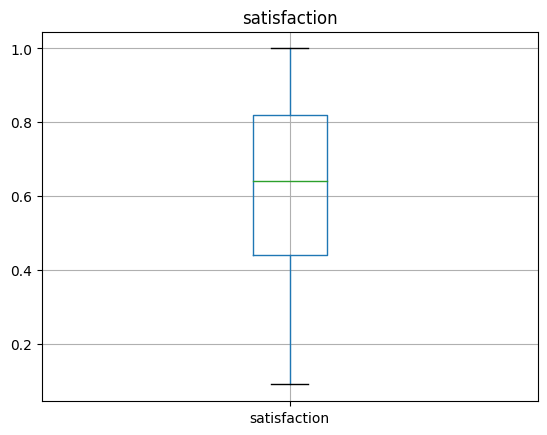

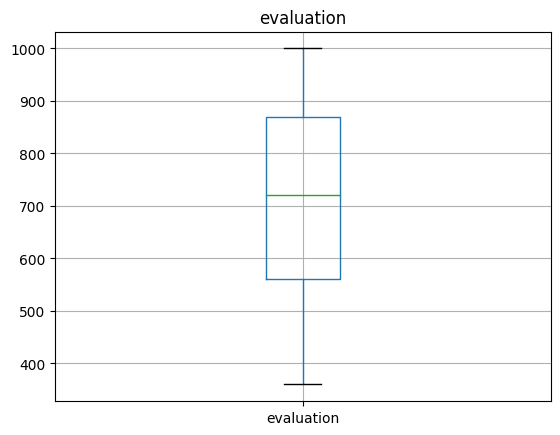

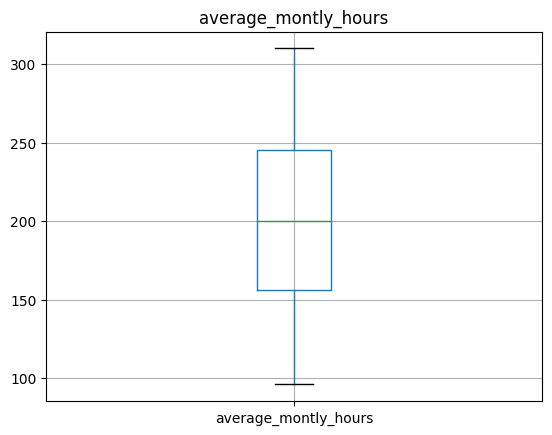

In [72]:
for column in df.select_dtypes(include=['number']):
  plt.figure()
  df.boxplot([column])
  plt.title(column)

In [73]:
for column in df.select_dtypes(include=['number']):
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  count = outliers.shape[0]
  print(f"Outliers in {column}: {count}")


Outliers in satisfaction: 0
Outliers in evaluation: 0
Outliers in average_montly_hours: 0


* There is no outliers present in the dataset

